In [1]:
# Loading in functions
from non_max_surpression import NonMaxSurpression
from model import DogDetectorModel
from image_to_tensor import to_tensor

# Loading libraries
import torch 

In [2]:
# Initializing the model
model = DogDetectorModel()

In [3]:
# Initializing Non Max Surpression with default parameters
nms = NonMaxSurpression()

In [4]:
# Loading the checkpoint
checkpoint = torch.load('model.pt')

# Loading the model weights
model.load_state_dict(checkpoint['model_state_dict'])

# Setting model to evaluation model
model = model.eval()

In [5]:
# Loading and transforming images
images = to_tensor(['00a9de4ad27bf0a9.jpg', '0a4998c59691bc8a.jpg'])

In [6]:
# Running image through model
outputs = model(images, '')

/home/aidan/Programs/miniconda3/envs/dogapp/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
# Executing non max surpression on the model output
outputs = nms(outputs)

In [13]:
model.model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [12]:
outputs

[{'boxes': [[197.399658203125,
    580.7478637695312,
    528.6137084960938,
    873.1482543945312],
   [314.3021545410156,
    563.9722290039062,
    390.17205810546875,
    669.6755981445312]],
  'labels': [1.0, 1.0],
  'scores': [0.9984139204025269, 0.7580587267875671]},
 {'boxes': [[67.4504623413086,
    170.60089111328125,
    566.7142944335938,
    960.31494140625]],
  'labels': [1.0],
  'scores': [0.9975951313972473]}]

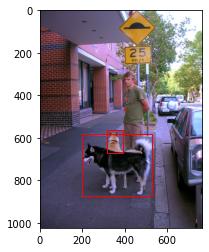

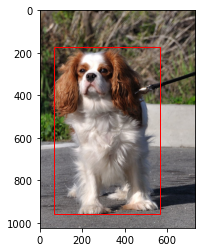

In [9]:
# YOU DON"T NEED THIS PART ITS JUST FOR FUN

from plot_tensor import plot_tensor
import numpy as np

# Plotting image just for fun (you don't need this)
for i in range(0, len(images)):
    plot_tensor(images[i],np.array(outputs[i]['boxes']))

In [ ]:
- small vs medium vs large